# DATA PREPROCESSING

### import libraries for preprocessing

In [2]:
import os
import numpy as np 
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### SEED-French dataset

In [3]:
# specifying path for french dataset
current_dir = os.path.dirname(os.getcwd())
feature_1s_dir = os.path.join(current_dir, 'EEG_project', 'data', 'raw', 'French', 'eeg_used_1s')

# retrieve files with eeg signal of 1 second
file_1s_list = os.listdir(feature_1s_dir)
file_1s_list.sort()

In [ ]:
# go through all of the files and save eeg signals with corresponding labels (positive, neutral, negative)

# variables to save eeg with labels
eeg_features = []
emotion_labels = []
for item in file_1s_list:

    # load a file with eeg
    npz_data = np.load( os.path.join(feature_1s_dir, item) )

    # start of the training data retrieval
    # get the label for the siginal
    data = npz_data['train_label']

    # variables that are necessary to track on what time window the signal start and ends
    signal_end = 0
    signal_start = 0

    # variable where all signals temporarly are stored
    signals = []
    # loop through the file and save ending and starting point of each signal
    for idx in range(1, len(data)):
        if data[idx] != data[idx - 1]:
            signal_end = idx - 1
            signals.append((signal_start, signal_end))
            signal_start = idx
    signals.append((signal_start, len(data) - 1))

    # loop through identified signals to retrieve the corresponding label
    for signal_indexes in signals:
        # get the label for the signal
        label = int(npz_data['train_label'][signal_indexes[0]:signal_indexes[1]+1][0])

        # get all of the 5 EEG channels from the signal per 62 electores
        feature_delta = pickle.loads(npz_data['train_data'])['delta'][signal_indexes[0]:signal_indexes[1]+1]
        feature_theta = pickle.loads(npz_data['train_data'])['theta'][signal_indexes[0]:signal_indexes[1]+1]
        feature_alpha = pickle.loads(npz_data['train_data'])['alpha'][signal_indexes[0]:signal_indexes[1]+1]
        feature_beta = pickle.loads(npz_data['train_data'])['beta'][signal_indexes[0]:signal_indexes[1]+1]
        feature_gamma = pickle.loads(npz_data['train_data'])['gamma'][signal_indexes[0]:signal_indexes[1]+1]
        
        # stack the channels in the appropriate manner
        features_3d = np.stack([feature_delta, feature_theta, feature_alpha, feature_beta, feature_gamma], axis=0)

        # transpose the stacked channels so the shape of the data will be (SIGNALS, CHANNELS, NUMER OF TIME WINDOWS)
        features_3d = np.transpose(features_3d, (2, 1, 0))  # Swap 1st and 3rd dimensions

        # specify indexes of electrodes of interest (retrieved from corresponding EXCEL file with electrodes mapping)
        needed_electrodes = [3, 4, 23, 31, 45] #AF3, AF4, T7, T8, Pz
        features_3d = features_3d[needed_electrodes,:,:]

        # add the signal into saved signals
        eeg_features.append(features_3d)
        # add the label into saved signals
        emotion_labels.append(label)


    # start of the testing data retrieval
    # get the label for the siginal
    data = npz_data['test_label']

    # variables that are necessary to track on what time window the signal start and ends
    signal_end = 0
    signal_start = 0

    # variable where all signals temporarly are stored
    signals = []
    # loop through the file and save ending and starting point of each signal
    for idx in range(1, len(data)):
        if data[idx] != data[idx - 1]:
            signal_end = idx - 1
            signals.append((signal_start, signal_end))
            signal_start = idx
    signals.append((signal_start, len(data) - 1))

    # loop through identified signals to retrieve the corresponding label
    for signal_indexes in signals:
        # get the label for the signal
        label = int(npz_data['test_label'][signal_indexes[0]:signal_indexes[1]+1][0])

        # get all of the 5 EEG channels from the signal per 62 electores
        feature_delta = pickle.loads(npz_data['test_data'])['delta'][signal_indexes[0]:signal_indexes[1]+1]
        feature_theta = pickle.loads(npz_data['test_data'])['theta'][signal_indexes[0]:signal_indexes[1]+1]
        feature_alpha = pickle.loads(npz_data['test_data'])['alpha'][signal_indexes[0]:signal_indexes[1]+1]
        feature_beta = pickle.loads(npz_data['test_data'])['beta'][signal_indexes[0]:signal_indexes[1]+1]
        feature_gamma = pickle.loads(npz_data['test_data'])['gamma'][signal_indexes[0]:signal_indexes[1]+1]
        
        # stack the channels in the appropriate manner
        features_3d = np.stack([feature_delta, feature_theta, feature_alpha, feature_beta, feature_gamma], axis=0)

        # transpose the stacked channels so the shape of the data will be (SIGNALS, CHANNELS, NUMER OF TIME WINDOWS)
        features_3d = np.transpose(features_3d, (2, 1, 0))  # Swap 1st and 3rd dimensions

        # specify indexes of electrodes of interest (retrieved from corresponding EXCEL file with electrodes mapping)
        needed_electrodes = [3, 4, 23, 31, 45] #AF3, AF4, T7, T8, Pz
        features_3d = features_3d[needed_electrodes,:,:]

        # add the signal into saved signals
        eeg_features.append(features_3d)
        # add the label into saved signals
        emotion_labels.append(label)

print(len(eeg_features), len(emotion_labels))

[[[24.92635022 21.4927361  20.73701699 18.88877936 16.07382037]
  [24.93042815 21.49310042 20.73575712 18.88794779 16.07380906]
  [24.93268126 21.49440448 20.73542242 18.88701344 16.07270673]
  ...
  [24.62882562 21.76334238 21.07369392 19.0786757  16.08130162]
  [24.62877914 21.76266439 21.07515761 19.07924889 16.07997251]
  [24.63101395 21.76307078 21.07551272 19.08004037 16.079071  ]]

 [[24.45547946 21.3702542  20.83291826 18.90763237 15.99207707]
  [24.4544185  21.36967406 20.83125035 18.9072633  15.99302802]
  [24.45395089 21.36919351 20.82992147 18.90686497 15.99241386]
  ...
  [25.30932305 21.73891892 21.09917134 19.04963269 15.91979655]
  [25.31036267 21.73921351 21.10032261 19.05011044 15.9187583 ]
  [25.31180699 21.73949862 21.10093829 19.050734   15.91844276]]

 [[25.27706472 20.95672877 21.139124   22.16831902 22.55161107]
  [25.27586978 20.95627825 21.13861198 22.16791685 22.55107739]
  [25.2740014  20.95688824 21.13858149 22.16651787 22.5505082 ]
  ...
  [25.63420385 21.

path to SEED-French database (processed)

In [30]:
#specify the file where to save retrieved dataset
french_dir = os.path.join(current_dir, 'EEG_project', 'data', 'processed', 'French')

save seed-fr dataset

In [31]:
# save the dataset
with open(os.path.join(french_dir, 'eeg_features.pkl'), 'wb') as f:
    pickle.dump(eeg_features, f)
with open(os.path.join(french_dir, 'emotion_labels.pkl'), 'wb') as f:
    pickle.dump(emotion_labels, f)

load seed-fr dataet

In [32]:
# Load SEED database
with open(os.path.join(french_dir, 'eeg_features.pkl'), 'rb') as f:
    eeg_features_seed_fr = pickle.load(f)
with open(os.path.join(french_dir, 'emotion_labels.pkl'), 'rb') as f:
    emotion_labels_seed_fr = pickle.load(f)
print(len(emotion_labels_seed_fr), "Samples in SEED dataset")

480 Samples in SEED dataset


plot the dataset distribution 

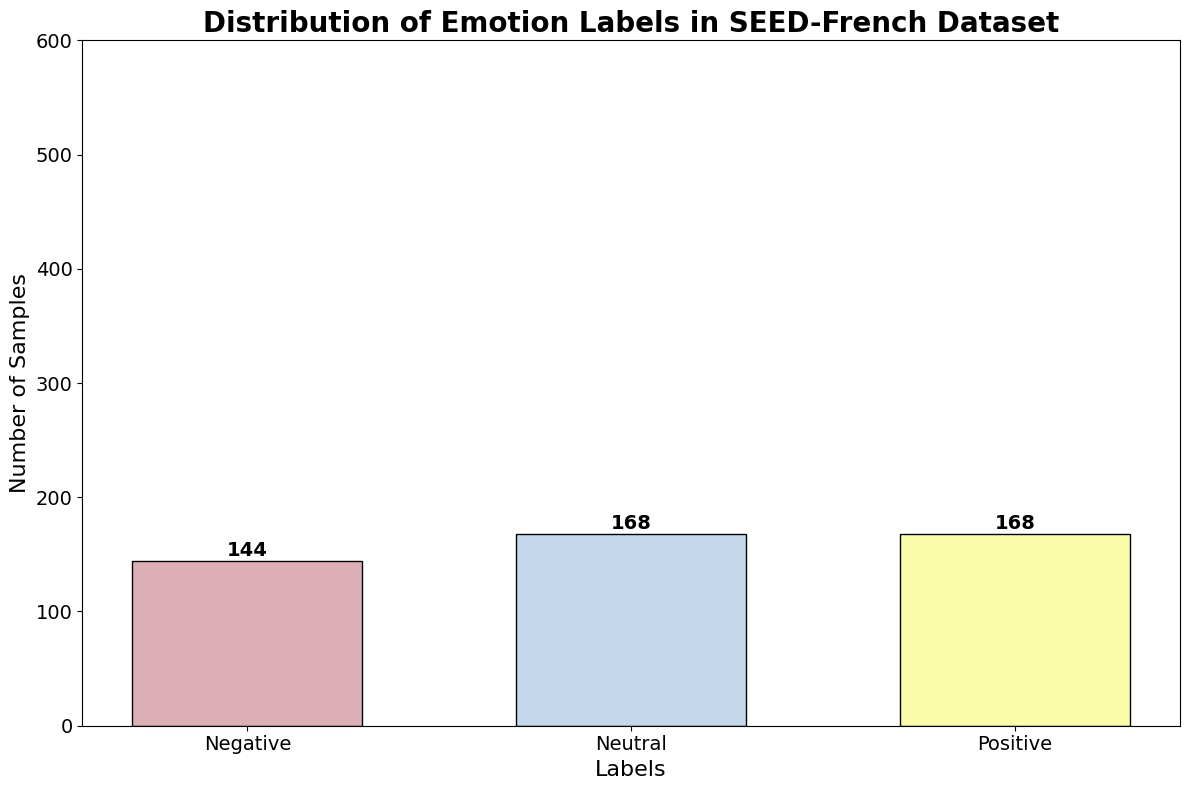

[144 168 168]


In [33]:
# Count the occurrences of each label
label_counts = pd.Series(emotion_labels_seed_fr).value_counts().sort_index()

# Create a mapping for emotion labels
emotion_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
label_counts.index = [emotion_mapping.get(i, str(i)) for i in label_counts.index]

# Define custom colors for each emotion using hex values
emotion_colors = {
    "Negative": "#ddafb7",  # firebrick in hex
    "Neutral": "#c4d7eb",   # gold in hex
    "Positive": "#fafca8"   # forestgreen in hex
}

# Create a bar plot with larger text
plt.figure(figsize=(12, 8))
bars = plt.bar(label_counts.index, label_counts.values, 
               color=[emotion_colors[label] for label in label_counts.index],
               width=0.6,
               edgecolor='black',  # Add black frame
               linewidth=1)      # Make it thin

# Increase text sizes
plt.title('Distribution of Emotion Labels in SEED-French Dataset', fontsize=20, fontweight='bold')
plt.xlabel('Labels', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 600)  # Set y-axis limit to 600

# Add value annotations on top of each bar with larger font
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height}',
             ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# print out each label and its count
print(label_counts.values)

### SEED-German dataset

In [34]:
# specifying path for french dataset
current_dir = os.path.dirname(os.getcwd())
feature_1s_dir = os.path.join(current_dir, 'EEG_project', 'data', 'raw', 'German', 'eeg_used_1s')

# retrieve files with eeg signal of 1 second
file_1s_list = os.listdir(feature_1s_dir)
file_1s_list.sort()

In [35]:
# go through all of the files and save eeg signals with corresponding labels (positive, neutral, negative)

# variables to save eeg with labels
eeg_features = []
emotion_labels = []
for item in file_1s_list:

    # load a file with eeg
    npz_data = np.load( os.path.join(feature_1s_dir, item) )

    # start of the training data retrieval
    # get the label for the siginal
    data = npz_data['train_label']

    # variables that are necessary to track on what time window the signal start and ends
    signal_end = 0
    signal_start = 0

    # variable where all signals temporarly are stored
    signals = []
    # loop through the file and save ending and starting point of each signal
    for idx in range(1, len(data)):
        if data[idx] != data[idx - 1]:
            signal_end = idx - 1
            signals.append((signal_start, signal_end))
            signal_start = idx
    signals.append((signal_start, len(data) - 1))

    # loop through identified signals to retrieve the corresponding label
    for signal_indexes in signals:
        # get the label for the signal
        label = int(npz_data['train_label'][signal_indexes[0]:signal_indexes[1]+1][0])

        # get all of the 5 EEG channels from the signal per 62 electores
        feature_delta = pickle.loads(npz_data['train_data'])['delta'][signal_indexes[0]:signal_indexes[1]+1]
        feature_theta = pickle.loads(npz_data['train_data'])['theta'][signal_indexes[0]:signal_indexes[1]+1]
        feature_alpha = pickle.loads(npz_data['train_data'])['alpha'][signal_indexes[0]:signal_indexes[1]+1]
        feature_beta = pickle.loads(npz_data['train_data'])['beta'][signal_indexes[0]:signal_indexes[1]+1]
        feature_gamma = pickle.loads(npz_data['train_data'])['gamma'][signal_indexes[0]:signal_indexes[1]+1]
        
        # stack the channels in the appropriate manner
        features_3d = np.stack([feature_delta, feature_theta, feature_alpha, feature_beta, feature_gamma], axis=0)

        # transpose the stacked channels so the shape of the data will be (SIGNALS, CHANNELS, NUMER OF TIME WINDOWS)
        features_3d = np.transpose(features_3d, (2, 1, 0))  # Swap 1st and 3rd dimensions

        # specify indexes of electrodes of interest (retrieved from corresponding EXCEL file with electrodes mapping)
        needed_electrodes = [3, 4, 23, 31, 45] #AF3, AF4, T7, T8, Pz
        features_3d = features_3d[needed_electrodes,:,:]

        # add the signal into saved signals
        eeg_features.append(features_3d)
        # add the label into saved signals
        emotion_labels.append(label)


    # start of the testing data retrieval
    # get the label for the siginal
    data = npz_data['test_label']

    # variables that are necessary to track on what time window the signal start and ends
    signal_end = 0
    signal_start = 0

    # variable where all signals temporarly are stored
    signals = []
    # loop through the file and save ending and starting point of each signal
    for idx in range(1, len(data)):
        if data[idx] != data[idx - 1]:
            signal_end = idx - 1
            signals.append((signal_start, signal_end))
            signal_start = idx
    signals.append((signal_start, len(data) - 1))

    # loop through identified signals to retrieve the corresponding label
    for signal_indexes in signals:
        # get the label for the signal
        label = int(npz_data['test_label'][signal_indexes[0]:signal_indexes[1]+1][0])

        # get all of the 5 EEG channels from the signal per 62 electores
        feature_delta = pickle.loads(npz_data['test_data'])['delta'][signal_indexes[0]:signal_indexes[1]+1]
        feature_theta = pickle.loads(npz_data['test_data'])['theta'][signal_indexes[0]:signal_indexes[1]+1]
        feature_alpha = pickle.loads(npz_data['test_data'])['alpha'][signal_indexes[0]:signal_indexes[1]+1]
        feature_beta = pickle.loads(npz_data['test_data'])['beta'][signal_indexes[0]:signal_indexes[1]+1]
        feature_gamma = pickle.loads(npz_data['test_data'])['gamma'][signal_indexes[0]:signal_indexes[1]+1]
        
        # stack the channels in the appropriate manner
        features_3d = np.stack([feature_delta, feature_theta, feature_alpha, feature_beta, feature_gamma], axis=0)

        # transpose the stacked channels so the shape of the data will be (SIGNALS, CHANNELS, NUMER OF TIME WINDOWS)
        features_3d = np.transpose(features_3d, (2, 1, 0))  # Swap 1st and 3rd dimensions

        # specify indexes of electrodes of interest (retrieved from corresponding EXCEL file with electrodes mapping)
        needed_electrodes = [3, 4, 23, 31, 45] #AF3, AF4, T7, T8, Pz
        features_3d = features_3d[needed_electrodes,:,:]

        # add the signal into saved signals
        eeg_features.append(features_3d)
        # add the label into saved signals
        emotion_labels.append(label)

print(len(eeg_features), len(emotion_labels))

300 300


path to SEED-German database (processed)

In [36]:
#specify the file where to save retrieved dataset
german_dir = os.path.join(current_dir, 'EEG_project', 'data', 'processed', 'German')

save the SEED-German database (processed)

In [37]:
# save the dataset
with open(os.path.join(german_dir, 'eeg_features.pkl'), 'wb') as f:
    pickle.dump(eeg_features, f)
with open(os.path.join(german_dir, 'emotion_labels.pkl'), 'wb') as f:
    pickle.dump(emotion_labels, f)

load the SEED-German database (processed)

In [38]:
# Load SEED database
with open(os.path.join(german_dir, 'eeg_features.pkl'), 'rb') as f:
    eeg_features_seed_ger = pickle.load(f)
with open(os.path.join(german_dir, 'emotion_labels.pkl'), 'rb') as f:
    emotion_labels_seed_ger = pickle.load(f)
print(len(emotion_labels_seed_ger), "Samples in SEED-German dataset")

300 Samples in SEED-German dataset


plot the SEED-German database (processed)

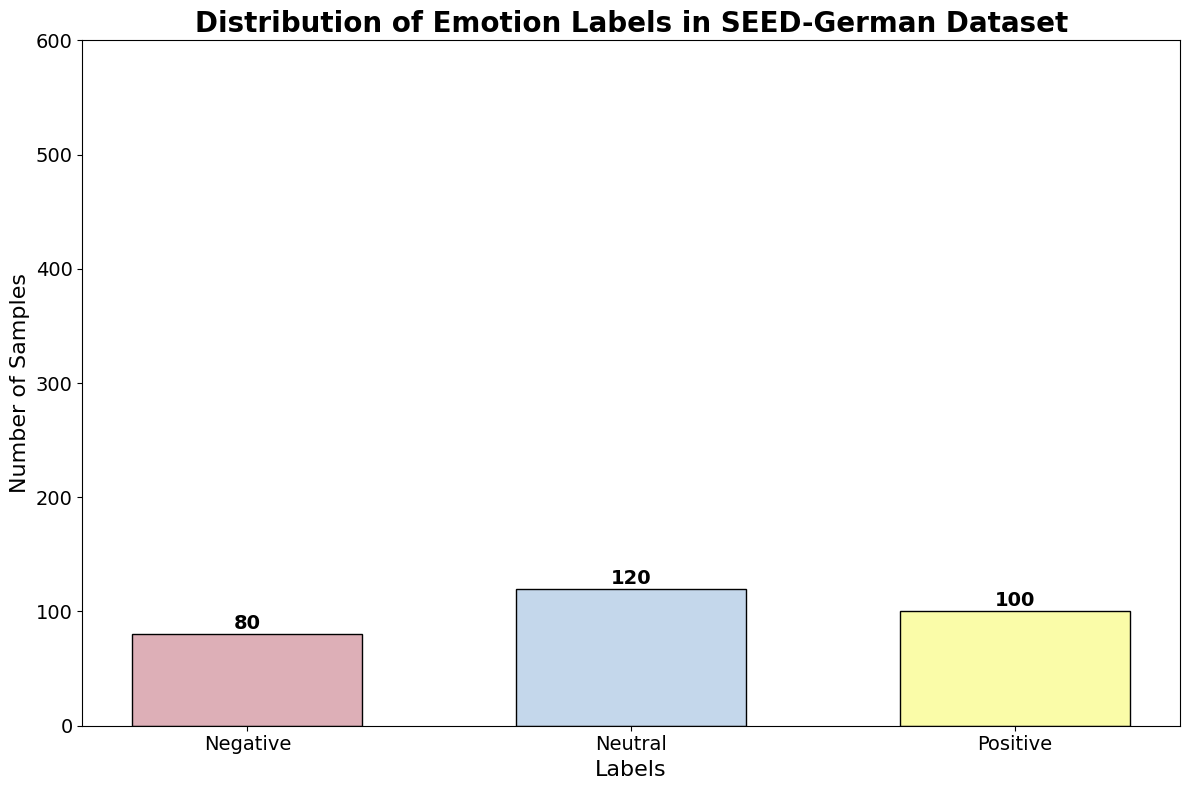

[ 80 120 100]


In [39]:
# Count the occurrences of each label
label_counts = pd.Series(emotion_labels_seed_ger).value_counts().sort_index()

# Create a mapping for emotion labels
emotion_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
label_counts.index = [emotion_mapping.get(i, str(i)) for i in label_counts.index]

# Define custom colors for each emotion using hex values
emotion_colors = {
    "Negative": "#ddafb7",  # firebrick in hex
    "Neutral": "#c4d7eb",   # gold in hex
    "Positive": "#fafca8"   # forestgreen in hex
}

# Create a bar plot with larger text
plt.figure(figsize=(12, 8))
bars = plt.bar(label_counts.index, label_counts.values, 
               color=[emotion_colors[label] for label in label_counts.index],
               width=0.6,
               edgecolor='black',  # Add black frame
               linewidth=1)      # Make it thin

# Increase text sizes
plt.title('Distribution of Emotion Labels in SEED-German Dataset', fontsize=20, fontweight='bold')
plt.xlabel('Labels', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 600)  # Set y-axis limit to 600

# Add value annotations on top of each bar with larger font
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height}',
             ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# print out each label and its count
print(label_counts.values)

### SEED database

In [40]:
# specifying path for french dataset
current_dir = os.path.dirname(os.getcwd())
seed_path = os.path.join(current_dir, 'EEG_project', 'data', 'raw', 'SEED', 'ExtractedFeatures_1s')

In [41]:
# save all names of the mathLab files from the SEED directory
files = [f for f in os.listdir(seed_path) if f.endswith('.mat')]

# prepare variables where files would be saved
eeg_features = []
emotion_labels = []

# iterate through every file
for file in files:
    if file != 'label.mat':

        # get the path to the exact file with EEG signals
        file_path = os.path.join(seed_path, file)
        
        # load the file
        data = scipy.io.loadmat(file_path)

        # go through the file to find all features that are matching the desired type (LDS)
        for var_ in data.keys():
            if "de_LDS" in var_:
                
                # retrieve all EEG data from the desired file
                feature_data = np.array(data[var_])

                # specify indexes of electrodes of interest (retrieved from corresponding EXCEL file with electrodes mapping)
                needed_electrodes = [3, 4, 23, 31, 45] #AF3, AF4, T7, T8, Pz
                eeg_features.append(feature_data[needed_electrodes,:,:])

                # retrieve the label path
                label_file_path = os.path.join(seed_path, 'label.mat')
                # load the file 
                label_data = scipy.io.loadmat(label_file_path)
                # get the label that correspinds to the features of interest
                label = label_data['label'][0, int(var_[6:])-1] + 1 # Add 1 to make labels start from 0
                emotion_labels.append(label)
                
print(len(eeg_features), len(emotion_labels))

675 675


path to the SEED database (processed)

In [42]:
seed_dir = os.path.join(current_dir, 'EEG_project', 'data', 'processed','SEED')

save the SEED database

In [43]:
with open(os.path.join(seed_dir, 'eeg_features.pkl'), 'wb') as f:
    pickle.dump(eeg_features, f)
with open(os.path.join(seed_dir, 'emotion_labels.pkl'), 'wb') as f:
    pickle.dump(emotion_labels, f)
print(f"Saved {len(eeg_features)} EEG feature arrays and {len(emotion_labels)} labels.")

Saved 675 EEG feature arrays and 675 labels.


load the SEED database

In [44]:
# Load SEED database
with open(os.path.join(seed_dir, 'eeg_features.pkl'), 'rb') as f:
    eeg_features_seed = pickle.load(f)
with open(os.path.join(seed_dir, 'emotion_labels.pkl'), 'rb') as f:
    emotion_labels_seed = pickle.load(f)
print(len(emotion_labels_seed), "Samples in SEED dataset")

675 Samples in SEED dataset


plot the SEED database

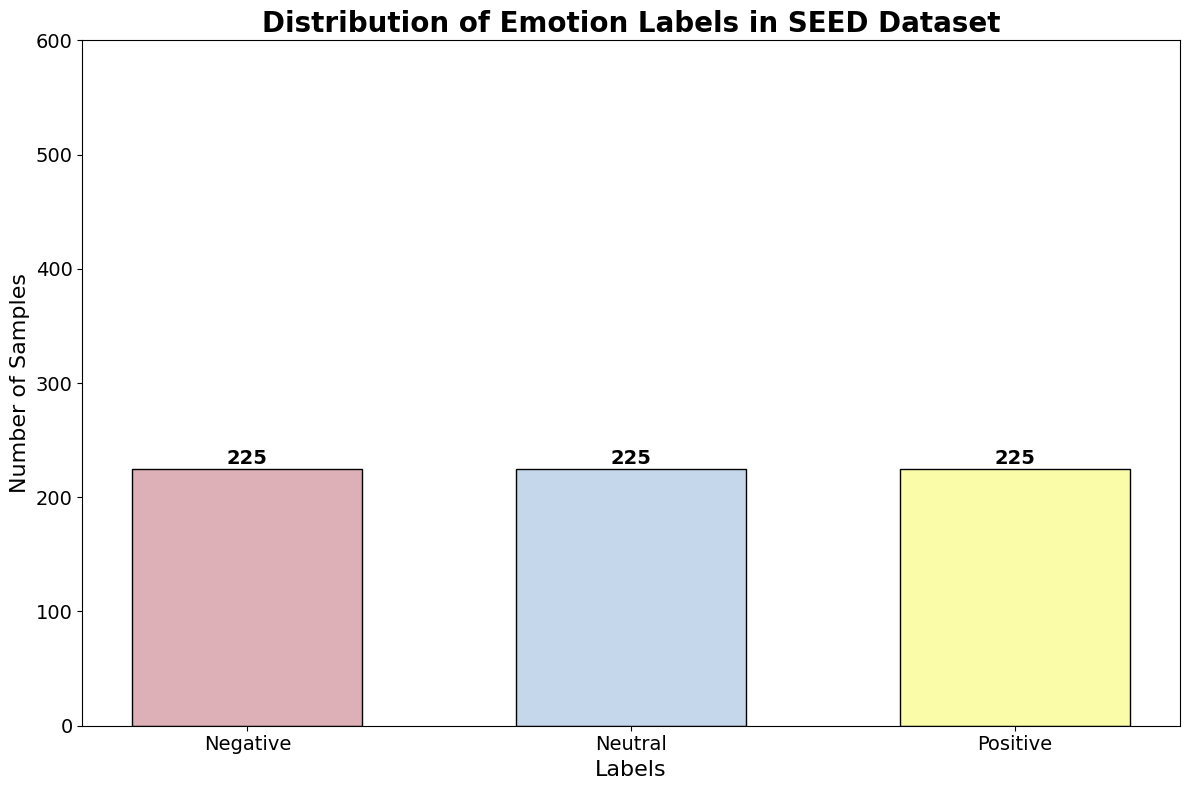

[225 225 225]


In [45]:
# Count the occurrences of each label
label_counts = pd.Series(emotion_labels_seed).value_counts().sort_index()

# Create a mapping for emotion labels
emotion_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
label_counts.index = [emotion_mapping.get(i, str(i)) for i in label_counts.index]

# Define custom colors for each emotion using hex values
emotion_colors = {
    "Negative": "#ddafb7",  # firebrick in hex
    "Neutral": "#c4d7eb",   # gold in hex
    "Positive": "#fafca8"   # forestgreen in hex
}

# Create a bar plot with larger text
plt.figure(figsize=(12, 8))
bars = plt.bar(label_counts.index, label_counts.values, 
               color=[emotion_colors[label] for label in label_counts.index],
               width=0.6,
               edgecolor='black',  # Add black frame
               linewidth=1)      # Make it thin

# Increase text sizes
plt.title('Distribution of Emotion Labels in SEED Dataset', fontsize=20, fontweight='bold')
plt.xlabel('Labels', fontsize=16)
plt.ylabel('Number of Samples', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 600)  # Set y-axis limit to 600

# Add value annotations on top of each bar with larger font
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height}',
             ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# print out each label and its count
print(label_counts.values)

### Unified Database

In [24]:
import os
import pickle
import pandas as pd

retrieve unified database from SEED, SEED-German, SEED-French

In [47]:
# collect all labels into one variable
unified_labels = emotion_labels_seed + emotion_labels_seed_fr + emotion_labels_seed_ger
print(len(unified_labels), "Samples in unified dataset")
# collect all features into one variable
unified_features = eeg_features_seed + eeg_features_seed_fr + eeg_features_seed_ger

1455 Samples in unified dataset


path specification for the unified database

In [48]:
current_dir = os.path.dirname(os.getcwd())
unified_dir = os.path.join(current_dir, 'EEG_project', 'data', 'processed','SEED-Uni')

save the unified database

In [49]:
with open(os.path.join(unified_dir, 'eeg_features.pkl'), 'wb') as f:
    pickle.dump(unified_features, f)
with open(os.path.join(unified_dir, 'emotion_labels.pkl'), 'wb') as f:
    pickle.dump(unified_labels, f)
print(f"Saved {len(unified_features)} EEG feature arrays and {len(unified_labels)} labels.")

Saved 1455 EEG feature arrays and 1455 labels.


load the unified database

In [22]:
# Load SEED database
with open(os.path.join(unified_dir, 'eeg_features.pkl'), 'rb') as f:
    unified_features = pickle.load(f)
with open(os.path.join(unified_dir, 'emotion_labels.pkl'), 'rb') as f:
    unified_labels = pickle.load(f)
print(len(unified_features), "Samples in SEED dataset")

1455 Samples in SEED dataset


plot the unified database

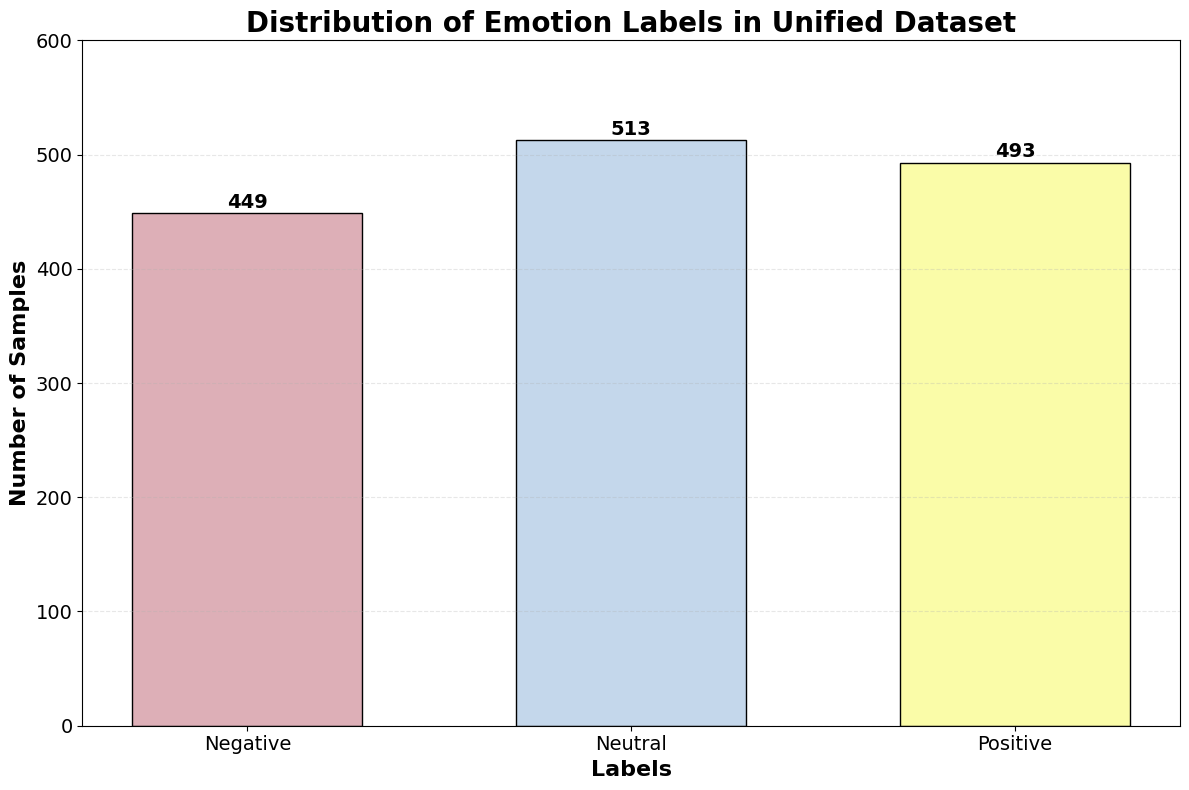

[449 513 493]


In [26]:
# Count the occurrences of each label
label_counts = pd.Series(unified_labels).value_counts().sort_index()

# Create a mapping for emotion labels
emotion_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
label_counts.index = [emotion_mapping.get(i, str(i)) for i in label_counts.index]

# Define custom colors for each emotion using hex values
emotion_colors = {
    "Negative": "#ddafb7",  # firebrick in hex
    "Neutral": "#c4d7eb",   # gold in hex
    "Positive": "#fafca8"   # forestgreen in hex
}

# Create a bar plot with larger text
plt.figure(figsize=(12, 8))
bars = plt.bar(label_counts.index, label_counts.values, 
               color=[emotion_colors[label] for label in label_counts.index],
               width=0.6,
               edgecolor='black',  # Add black frame
               linewidth=1)      # Make it thin

# Increase text sizes and make labels bold
plt.title('Distribution of Emotion Labels in Unified Dataset', fontsize=20, fontweight='bold')
plt.xlabel('Labels', fontsize=16, fontweight='bold')
plt.ylabel('Number of Samples', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 600)  # Set y-axis limit to 600

# Add light grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add value annotations on top of each bar with larger font
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height}',
             ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# print out each label and its count
print(label_counts.values)

# Model Specification

import all necessary libraries

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import random
from torchsummary import summary
import pickle
import os
import matplotlib.pyplot as plt

load the dataset

In [3]:

# Load SEED database
current_dir = os.path.dirname(os.getcwd())
unified_dir = os.path.join(current_dir, 'EEG_project', 'data', 'processed','SEED-Uni')
with open(os.path.join(unified_dir, 'eeg_features.pkl'), 'rb') as f:
    unified_features = pickle.load(f)
with open(os.path.join(unified_dir, 'emotion_labels.pkl'), 'rb') as f:
    unified_labels = pickle.load(f)
print(len(unified_features), "Samples in SEED dataset")

1455 Samples in SEED dataset


Creation of the positional encoding

In [4]:
class DataFit(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [5]:
class PositionalEncoding(nn.Module):
    # specification of embedding dimensions of the data, as well its maximum length and dropout
    def __init__(self, d_model, max_len=1000, dropout=0.1):
        super().__init__()
        # initialization of the dropout layer
        self.dropout = nn.Dropout(p=dropout)
        # initialization of the positional encoding (first empy matrix that then will be filled with values)
        pe = torch.zeros(max_len, d_model)
        # calculation of the positional encoding values (before cos/sin)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))

        # calculation of the positional encoding values (before cos/sin)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        # add a batch dimension to the positional encoding (shape (1, max_len, d_model))
        pe = pe.unsqueeze(0)  
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x is (B, T, d_model)
        T = x.size(1)
        x = x + self.pe[:, :T, :].to(x.device)
        return self.dropout(x)

In [6]:
def eeg_collate_fn_new(batch):
    """
    Custom collate function to handle variable-length EEG data in shape (5, T, 5).
    Steps:
      1) Find the max T in the batch.
      2) Pad all EEG data to (5, max_T, 5).
      3) Create a padding mask for each sample: shape (batch, max_T).
         True = padded, False = valid.
    """
    # 1) Find max T
    max_T = 0
    for eeg, _ in batch:
        _, T, _ = eeg.shape
        if T > max_T:
            max_T = T
    
    # Prepare storage
    batch_size = len(batch)
    # We'll store the padded EEG in a tensor: (batch_size, 5, max_T, 5)
    eeg_padded = torch.zeros(batch_size, 5, max_T, 5, dtype=torch.float32)
    # We'll create masks in a bool tensor: (batch_size, max_T)
    masks = torch.zeros(batch_size, max_T, dtype=torch.bool)
    labels = torch.zeros(batch_size, dtype=torch.long)
    
    # 2) Pad each sample
    for i, (eeg, label) in enumerate(batch):
        _, T, _ = eeg.shape
        eeg_padded[i, :, :T, :] = torch.from_numpy(eeg)
        # For the mask, positions beyond T are True (= padded)
        if T < max_T:
            masks[i, T:] = True
        labels[i] = label
    
    return eeg_padded, labels, masks

In [7]:
class EEG_CNN_Transformer(nn.Module):
    def __init__(self, 
                 num_classes=3,
                 cnn_out_channels=8,
                 cnn_kernel_size=3,
                 embed_dim=32,
                 num_heads=4,
                 num_layers=2,
                 ff_dim=128,
                 dropout=0.1,
                 max_len=1000):
        super().__init__()

        # CNN: single 2D conv
        self.cnn = nn.Conv2d(
            in_channels=1,
            out_channels=cnn_out_channels,
            kernel_size=cnn_kernel_size,
            stride=1,
            padding=cnn_kernel_size // 2
        )
        
        self.flat_size = cnn_out_channels * 5 * 5
        self.embedding = nn.Linear(self.flat_size, embed_dim)
        
        self.pos_encoder = PositionalEncoding(d_model=embed_dim, 
                                              max_len=max_len, 
                                              dropout=dropout)
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(embed_dim, embed_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(embed_dim, num_classes)
        )
    
    def forward(self, x, padding_mask=None):
        """
        x shape now is (batch_size, 5, T, 5).
          - 5 electrodes
          - T time windows (variable, padded)
          - 5 channels
        We'll:
          1) Permute to (B, T, 5, 5) so each time step is (5,5).
          2) Flatten -> (B*T, 1, 5, 5) to apply the CNN
          3) Flatten CNN output -> embed -> (B*T, embed_dim)
          4) Reshape to (B, T, embed_dim)
          5) Positional encode
          6) Transformer
          7) Mean pool over time
          8) Classifier
        """
        B, E, T, C = x.shape  # E=5 electrodes, T=var time, C=5 channels

        # 1) Permute to (B, T, E, C) => (B, T, 5, 5)
        x = x.permute(0, 2, 1, 3)  # (B, T, 5, 5)

        # 2) Flatten time into batch dimension & add in_channels=1
        x = x.unsqueeze(2)               # (B, T, 1, 5, 5)
        x = x.reshape(B*T, 1, 5, 5)      # (B*T, 1, 5, 5)

        # 3) CNN
        x = self.cnn(x)                  # (B*T, out_channels, 5, 5)
        x = F.relu(x)
        x = x.view(B*T, -1)              # (B*T, out_channels*5*5)
        x = self.embedding(x)            # (B*T, embed_dim)

        # 4) Reshape back to (B, T, embed_dim)
        x = x.view(B, T, -1)

        # 5) Positional encoding
        x = self.pos_encoder(x)  # (B, T, embed_dim)

        # 6) Transformer (padding_mask: True = ignore index)
        x = self.transformer_encoder(x, src_key_padding_mask=padding_mask)

        # 7) Mean pool across time
        x = x.mean(dim=1)

        # 8) Classifier
        logits = self.classifier(x)
        return logits

# Model Fitting

definition of all features and labels

In [8]:
X = unified_features
y = unified_labels
print(len(X), len(y))

np.mean(y)

1455 1455


1.0302405498281786

splitting the dataset into train and test datasets

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(len(y_train), len(y_test), len(y_val))

1018 219 218


specification of hyperparameters

In [9]:
from sklearn.model_selection import ParameterSampler

param_grid = {
    'batch_size': [8, 16, 32], #HYPERPARAMETER  16, 32
    'cnn_out_channels': [8, 16], # 16
    'cnn_kernel_size': [3, 5], # 3, 5
    'embed_dim': [32, 64], # 32, 64
    'num_heads': [4, 8], # 4, 8
    'num_layers': [2, 4], # 2, 4
    'ff_dim': [128, 256], # 128, 256
    'dropout': [0.1, 0.3], # 0.1, 0.3
    'lr': [1e-3, 5e-4], # 1e-3, 5e-4
}

models_n = 100
models_to_train = list(ParameterSampler(param_grid, n_iter=models_n, random_state=42))

initialize the device

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tune model with hyperparameters

In [ ]:
import time
models = []
model_num = 1
for params in models_to_train:
    # show on what hyperparameters the model will be trained
    # print(params)

    # create dataloader with specified number of batches
    batch_size = params['batch_size']

    train_dataset = DataFit(X_train, y_train)
    test_dataset = DataFit(X_test, y_test)

    train_loader = DataLoader(train_dataset,
                            batch_size=batch_size, 
                            shuffle=True, 
                            collate_fn=eeg_collate_fn_new)
    
    test_loader = DataLoader(test_dataset, 
                            batch_size=batch_size, 
                            shuffle=False, 
                            collate_fn=eeg_collate_fn_new)

    # create the model object
    model = EEG_CNN_Transformer(
        num_classes=3, # number of classes that the model classify
        max_len=1000, # maximum length of classified signal in number of 1 second time windows
        cnn_out_channels=params['cnn_out_channels'], # number of output channels from the CNN
        cnn_kernel_size=params['cnn_kernel_size'], # size of the CNN kernel
        embed_dim=params['embed_dim'], # embedding dimension
        num_heads=params['num_heads'], # number of heads in the multi-head attention
        num_layers=params['num_layers'], # number of transformer layers
        ff_dim=params['ff_dim'], # feed forward dimension
        dropout=params['dropout'], # dropout rate
    )

    # initialize the learning rate
    learning_rate = params['lr'] # learning rate
    # initialize the optimizer
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    # initialize the criterion (loss function)
    criterion = nn.CrossEntropyLoss() # criterion name

    # initialize the model
    model.to(device)

    # initialize the number of epochs
    num_epochs = 15

    # start = time.time()

    # define the training loop 
    for epoch in range(num_epochs):
        # set the model into training mode
        model.train()
        total_loss = 0.0
        # train the model in batches
        for batch_idx, (eeg, labels, mask) in enumerate(train_loader):
            eeg = eeg.to(device)       # (batch, 5, max_T, 5)
            labels = labels.to(device)
            mask = mask.to(device)     # (batch, max_T)
            
            # clean data from previously computed gradients
            optimizer.zero_grad()
            logits = model(eeg, padding_mask=mask)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        # calculate the average loss on training data
        avg_train_loss = total_loss / len(train_loader)

        # define the loop for model evalution on the test dataset
        model.eval()
        test_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_idx, (eeg, labels, mask) in enumerate(test_loader):
                eeg = eeg.to(device)
                labels = labels.to(device)
                mask = mask.to(device)
                
                # calculate the loss per batch
                logits = model(eeg, padding_mask=mask)
                loss = criterion(logits, labels)
                test_loss += loss.item()
                
                # calculate the prediction accuracy per batch
                preds = torch.argmax(logits, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
                
        # calculate loss per test dataset
        avg_test_loss = test_loss / len(test_loader)
        # calculate accuracy per test dataset
        test_acc = correct / total if total > 0 else 0

        # end = time.time()
        # time_passed = end - start
        # print(time_passed)

        # update the list of stats for all considered models with different hyperparameters
        models.append((params, test_acc))
        # print the statistics of the current trained model
        print(f"Model №{model_num}/{models_n}, Epoch №{epoch+1} Train Loss: {avg_train_loss:.4f}, "f"Test Loss: {avg_test_loss:.4f}, "f"Test Acc: {test_acc:.4f}")
    
    model_num += 1


# loop through all models and find the one with the lowest loss
best_params = None
best_test_acc= -10000000000
for params_, test_acc in models:
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_params = params_

print("Training complete")
print(best_params, best_test_acc)



Model №1/100, Epoch №1 Train Loss: 1.0935, Test Loss: 1.0902, Test Acc: 0.3288
Model №1/100, Epoch №2 Train Loss: 1.0616, Test Loss: 1.0810, Test Acc: 0.3288
Model №1/100, Epoch №3 Train Loss: 1.0528, Test Loss: 1.0675, Test Acc: 0.4612
Model №1/100, Epoch №4 Train Loss: 1.0151, Test Loss: 1.0419, Test Acc: 0.4018
Model №1/100, Epoch №5 Train Loss: 0.9900, Test Loss: 1.0659, Test Acc: 0.3790
Model №1/100, Epoch №6 Train Loss: 0.9505, Test Loss: 0.9640, Test Acc: 0.4886
Model №1/100, Epoch №7 Train Loss: 0.9424, Test Loss: 1.0645, Test Acc: 0.3927
Model №1/100, Epoch №8 Train Loss: 0.9480, Test Loss: 0.9794, Test Acc: 0.4749
Model №1/100, Epoch №9 Train Loss: 0.8812, Test Loss: 0.9791, Test Acc: 0.4292
Model №1/100, Epoch №10 Train Loss: 0.8693, Test Loss: 1.0029, Test Acc: 0.4155
Model №1/100, Epoch №11 Train Loss: 0.8511, Test Loss: 0.9213, Test Acc: 0.4795
Model №1/100, Epoch №12 Train Loss: 0.8734, Test Loss: 0.9038, Test Acc: 0.6210
Model №1/100, Epoch №13 Train Loss: 0.8761, Test 

train final model

In [11]:
# create dataloader with specified number of batches
batch_size = 8

train_dataset = DataFit(X_train, y_train)
test_dataset = DataFit(X_test, y_test)

train_loader = DataLoader(train_dataset,
                        batch_size=batch_size, 
                        shuffle=True, 
                        collate_fn=eeg_collate_fn_new)

test_loader = DataLoader(test_dataset, 
                        batch_size=batch_size, 
                        shuffle=False, 
                        collate_fn=eeg_collate_fn_new)

# create the model object
model = EEG_CNN_Transformer(
    num_classes=3, # number of classes that the model classify
    max_len=1000, # maximum length of classified signal in number of 1 second time windows
    cnn_out_channels=8, # number of output channels from the CNN
    cnn_kernel_size=5, # size of the CNN kernel
    embed_dim=64, # embedding dimension
    num_heads=4, # number of heads in the multi-head attention
    num_layers=2, # number of transformer layers
    ff_dim=128, # feed forward dimension
    dropout=0.1, # dropout rate
)

# initialize the learning rate
learning_rate = 0.0005 # learning rate
# initialize the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# initialize the criterion (loss function)
criterion = nn.CrossEntropyLoss() # criterion name

# initialize the model
model.to(device)

# initialize the number of epochs
num_epochs = 100

results = []
best_test_acc = 0
# define the training loop 
for epoch in range(num_epochs):
    # set the model into training mode
    model.train()
    total_loss = 0.0
    # train the model in batches
    for batch_idx, (eeg, labels, mask) in enumerate(train_loader):
        eeg = eeg.to(device)       # (batch, 5, max_T, 5)
        labels = labels.to(device)
        mask = mask.to(device)     # (batch, max_T)
        
        # clean data from previously computed gradients
        optimizer.zero_grad()
        logits = model(eeg, padding_mask=mask)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # calculate the average loss on training data
    avg_train_loss = total_loss / len(train_loader)

    # define the loop for model evalution on the test dataset
    model.eval()
    loss_test = 0.0
    loss_train = 0.0
    correct_test = 0
    correct_train = 0
    total_test = 0
    total_train = 0
    with torch.no_grad():

        for batch_idx, (eeg, labels, mask) in enumerate(train_loader):
            eeg = eeg.to(device)
            labels = labels.to(device)
            mask = mask.to(device)
            
            # calculate the loss per batch
            logits = model(eeg, padding_mask=mask)
            loss = criterion(logits, labels)
            loss_train += loss.item()
            
            # calculate the prediction accuracy per batch
            preds = torch.argmax(logits, dim=1)
            correct_train += (preds == labels).sum().item()
            total_train += labels.size(0)

        for batch_idx, (eeg, labels, mask) in enumerate(test_loader):
            eeg = eeg.to(device)
            labels = labels.to(device)
            mask = mask.to(device)
            
            # calculate the loss per batch
            logits = model(eeg, padding_mask=mask)
            loss = criterion(logits, labels)
            loss_test += loss.item()
            
            # calculate the prediction accuracy per batch
            preds = torch.argmax(logits, dim=1)
            correct_test += (preds == labels).sum().item()
            total_test += labels.size(0)

    # calculate loss per train dataset
    avg_train_loss = loss_train / len(train_loader)
    # calculate accuracy per train dataset
    train_acc = correct_train / total_train if total_train > 0 else 0

    # calculate loss per train dataset
    avg_test_loss = loss_test / len(test_loader)
    # calculate accuracy per train dataset
    test_acc = correct_test / total_test if total_test > 0 else 0

    # end = time.time()
    # time_passed = end - start
    # print(time_passed)

    # update the list of stats for all considered models with different hyperparameters
    results.append((epoch, train_acc, test_acc))
    # print the statistics of the current trained model
    print(f"Epoch №{epoch+1} Train accuracy: {train_acc:.4f}, Test Acc: {test_acc:.4f}")
    
    if best_test_acc < test_acc:
        print(best_test_acc, test_acc)
        best_test_acc = test_acc
        ### save the model
        # Save model checkpoint
        torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'test_accuracy': test_acc,
            'train_accuracy': train_acc,
        }, "best_model_v2.pt")
        print("best model updated with accuracy")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/nn/modules/transformer.py:502: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/NestedTensorImpl.cpp:180.)
  output = torch._nested_tensor_from_mask(


Epoch №1 Train accuracy: 0.3104, Test Acc: 0.3288
0 0.3287671232876712
best model updated with accuracy
Epoch №2 Train accuracy: 0.4303, Test Acc: 0.4521
0.3287671232876712 0.4520547945205479
best model updated with accuracy
Epoch №3 Train accuracy: 0.4833, Test Acc: 0.4886
0.4520547945205479 0.4885844748858447
best model updated with accuracy
Epoch №4 Train accuracy: 0.3595, Test Acc: 0.3607
Epoch №5 Train accuracy: 0.4008, Test Acc: 0.3973
Epoch №6 Train accuracy: 0.4224, Test Acc: 0.4201
Epoch №7 Train accuracy: 0.5187, Test Acc: 0.5388
0.4885844748858447 0.5388127853881278
best model updated with accuracy
Epoch №8 Train accuracy: 0.5786, Test Acc: 0.6073
0.5388127853881278 0.6073059360730594
best model updated with accuracy
Epoch №9 Train accuracy: 0.6346, Test Acc: 0.6667
0.6073059360730594 0.6666666666666666
best model updated with accuracy
Epoch №10 Train accuracy: 0.5697, Test Acc: 0.5616
Epoch №11 Train accuracy: 0.7220, Test Acc: 0.7306
0.6666666666666666 0.730593607305936
be

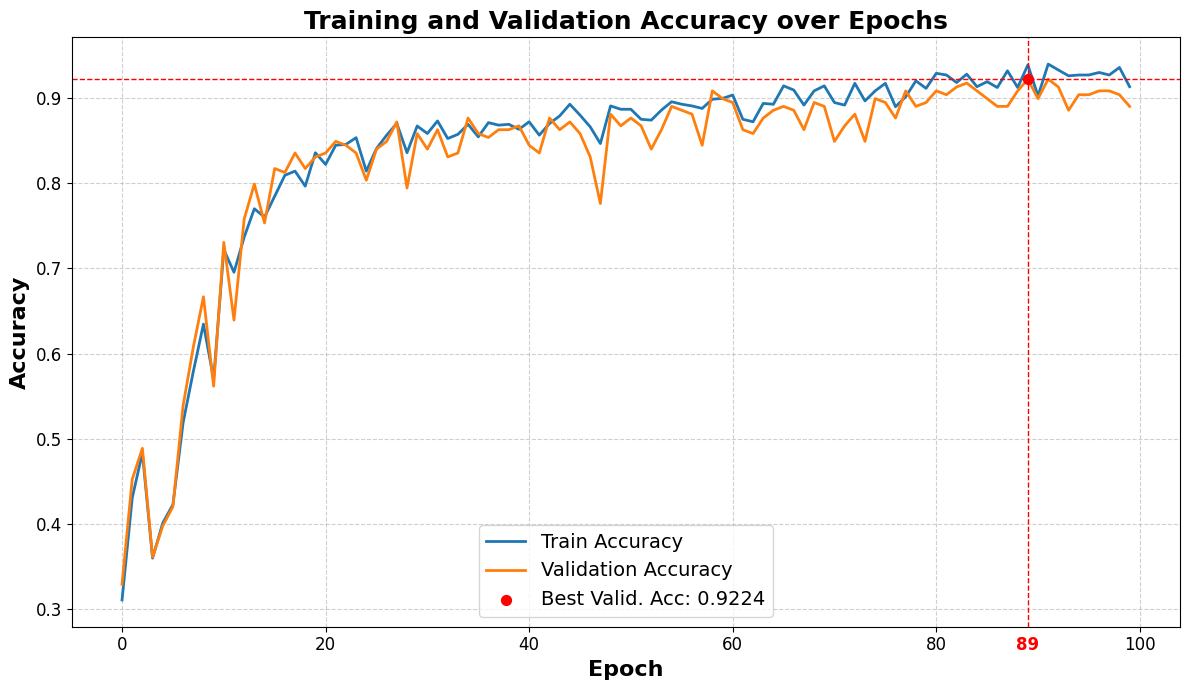

In [12]:
# Extract values
epochs = [r[0] for r in results]
train_accs = [r[1] for r in results]
test_accs = [r[2] for r in results]

# Find the best epoch for test accuracy
best_epoch = test_accs.index(max(test_accs))
best_test_acc = test_accs[best_epoch]

# Plot
plt.figure(figsize=(12, 7))

# Accuracy curves
plt.plot(epochs, train_accs, label='Train Accuracy', linewidth=2)
plt.plot(epochs, test_accs, label='Validation Accuracy', linewidth=2)

# Highlight best point
plt.scatter(best_epoch, best_test_acc, color='red', s=50, label=f'Best Valid. Acc: {best_test_acc:.4f}', zorder=5)
plt.axvline(x=best_epoch, color='red', linestyle='--', linewidth=1)
plt.axhline(y=best_test_acc, color='red', linestyle='--', linewidth=1)

# Annotate epoch number below x-axis
plt.text(best_epoch, plt.ylim()[0] - 0.011, f'{best_epoch}', 
         color='red', fontsize=12, fontweight='bold', 
         ha='center', va='top')

# Text settings
plt.xlabel('Epoch', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold')
plt.title('Training and Validation Accuracy over Epochs', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [13]:
batch_size = 8
val_dataset = DataFit(X_val, y_val)
val_loader = DataLoader(val_dataset, 
                            batch_size=batch_size, 
                            shuffle=False, 
                            collate_fn=eeg_collate_fn_new)

In [14]:
learning_rate = 0.0005
# create the model object
model = EEG_CNN_Transformer(
    num_classes=3, # number of classes that the model classify
    max_len=1000, # maximum length of classified signal in number of 1 second time windows
    cnn_out_channels=8, # number of output channels from the CNN
    cnn_kernel_size=5, # size of the CNN kernel
    embed_dim=64, # embedding dimension
    num_heads=4, # number of heads in the multi-head attention
    num_layers=2, # number of transformer layers
    ff_dim=128, # feed forward dimension
    dropout=0.1, # dropout rate
)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss() # criterion name
checkpoint = torch.load("best_model_v2.pt")
model.to(device)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

/var/folders/0p/4cfl81x976zg2f7j2g5c64nm0000gq/T/ipykernel_98654/4157971127.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load("best_model_v2.pt")


In [ ]:
model.eval()
loss_val = 0.0
correct_val = 0
total_val = 0
with torch.no_grad():

    for batch_idx, (eeg, labels, mask) in enumerate(val_loader):
        eeg = eeg.to(device)
        labels = labels.to(device)
        mask = mask.to(device)
        
        # calculate the loss per batch
        logits = model(eeg, padding_mask=mask)
        loss = criterion(logits, labels)
        loss_val += loss.item()
        
        # calculate the prediction accuracy per batch
        preds = torch.argmax(logits, dim=1)
        correct_val += (preds == labels).sum().item()
        print(preds, labels)
        total_val += labels.size(0)

 # calculate loss per train dataset
avg_val_loss = loss_val / len(val_loader)

# calculate accuracy per train dataset
val_acc = correct_val / total_val if total_val > 0 else 0



tensor([0, 1, 0, 1, 2, 1, 2, 1]) tensor([0, 1, 0, 1, 0, 1, 0, 1])
tensor([0, 2, 2, 1, 1, 2, 0, 1]) tensor([0, 2, 2, 1, 1, 2, 0, 1])
tensor([2, 1, 2, 2, 2, 2, 2, 0]) tensor([2, 1, 2, 2, 2, 2, 0, 0])
tensor([0, 2, 2, 1, 1, 1, 2, 1]) tensor([0, 1, 0, 1, 2, 1, 2, 1])
tensor([1, 2, 0, 1, 1, 2, 0, 2]) tensor([1, 0, 0, 1, 1, 2, 0, 2])
tensor([0, 1, 0, 0, 1, 1, 1, 2]) tensor([0, 1, 0, 0, 1, 1, 1, 2])
tensor([0, 2, 2, 1, 2, 1, 2, 0]) tensor([0, 2, 2, 1, 2, 1, 2, 0])
tensor([2, 2, 1, 0, 2, 1, 0, 1]) tensor([2, 2, 1, 0, 2, 1, 0, 1])
tensor([2, 1, 2, 2, 0, 1, 1, 0]) tensor([2, 1, 2, 2, 0, 1, 1, 2])
tensor([0, 0, 0, 1, 1, 2, 1, 0]) tensor([0, 0, 0, 1, 1, 2, 1, 0])
tensor([1, 1, 1, 1, 1, 2, 2, 2]) tensor([1, 1, 1, 1, 1, 2, 2, 2])
tensor([1, 2, 2, 2, 0, 1, 0, 2]) tensor([1, 2, 2, 2, 0, 1, 0, 2])
tensor([1, 0, 2, 0, 1, 1, 2, 0]) tensor([1, 0, 2, 0, 1, 1, 2, 0])
tensor([2, 1, 2, 2, 0, 0, 0, 1]) tensor([2, 1, 2, 2, 0, 0, 0, 2])
tensor([2, 2, 2, 0, 2, 1, 2, 1]) tensor([2, 2, 2, 0, 2, 1, 0, 1])
tensor([1,

In [22]:
print(val_acc)

0.908256880733945


In [16]:
# calculate F1
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# start calculating the F1 score
y_true = []
y_pred = []
with torch.no_grad():
    for batch_idx, (eeg, labels, mask) in enumerate(val_loader):
        eeg = eeg.to(device)
        labels = labels.to(device)
        mask = mask.to(device)
        
        # calculate the loss per batch
        logits = model(eeg, padding_mask=mask)
        preds = torch.argmax(logits, dim=1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
# calculate the F1 score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9222


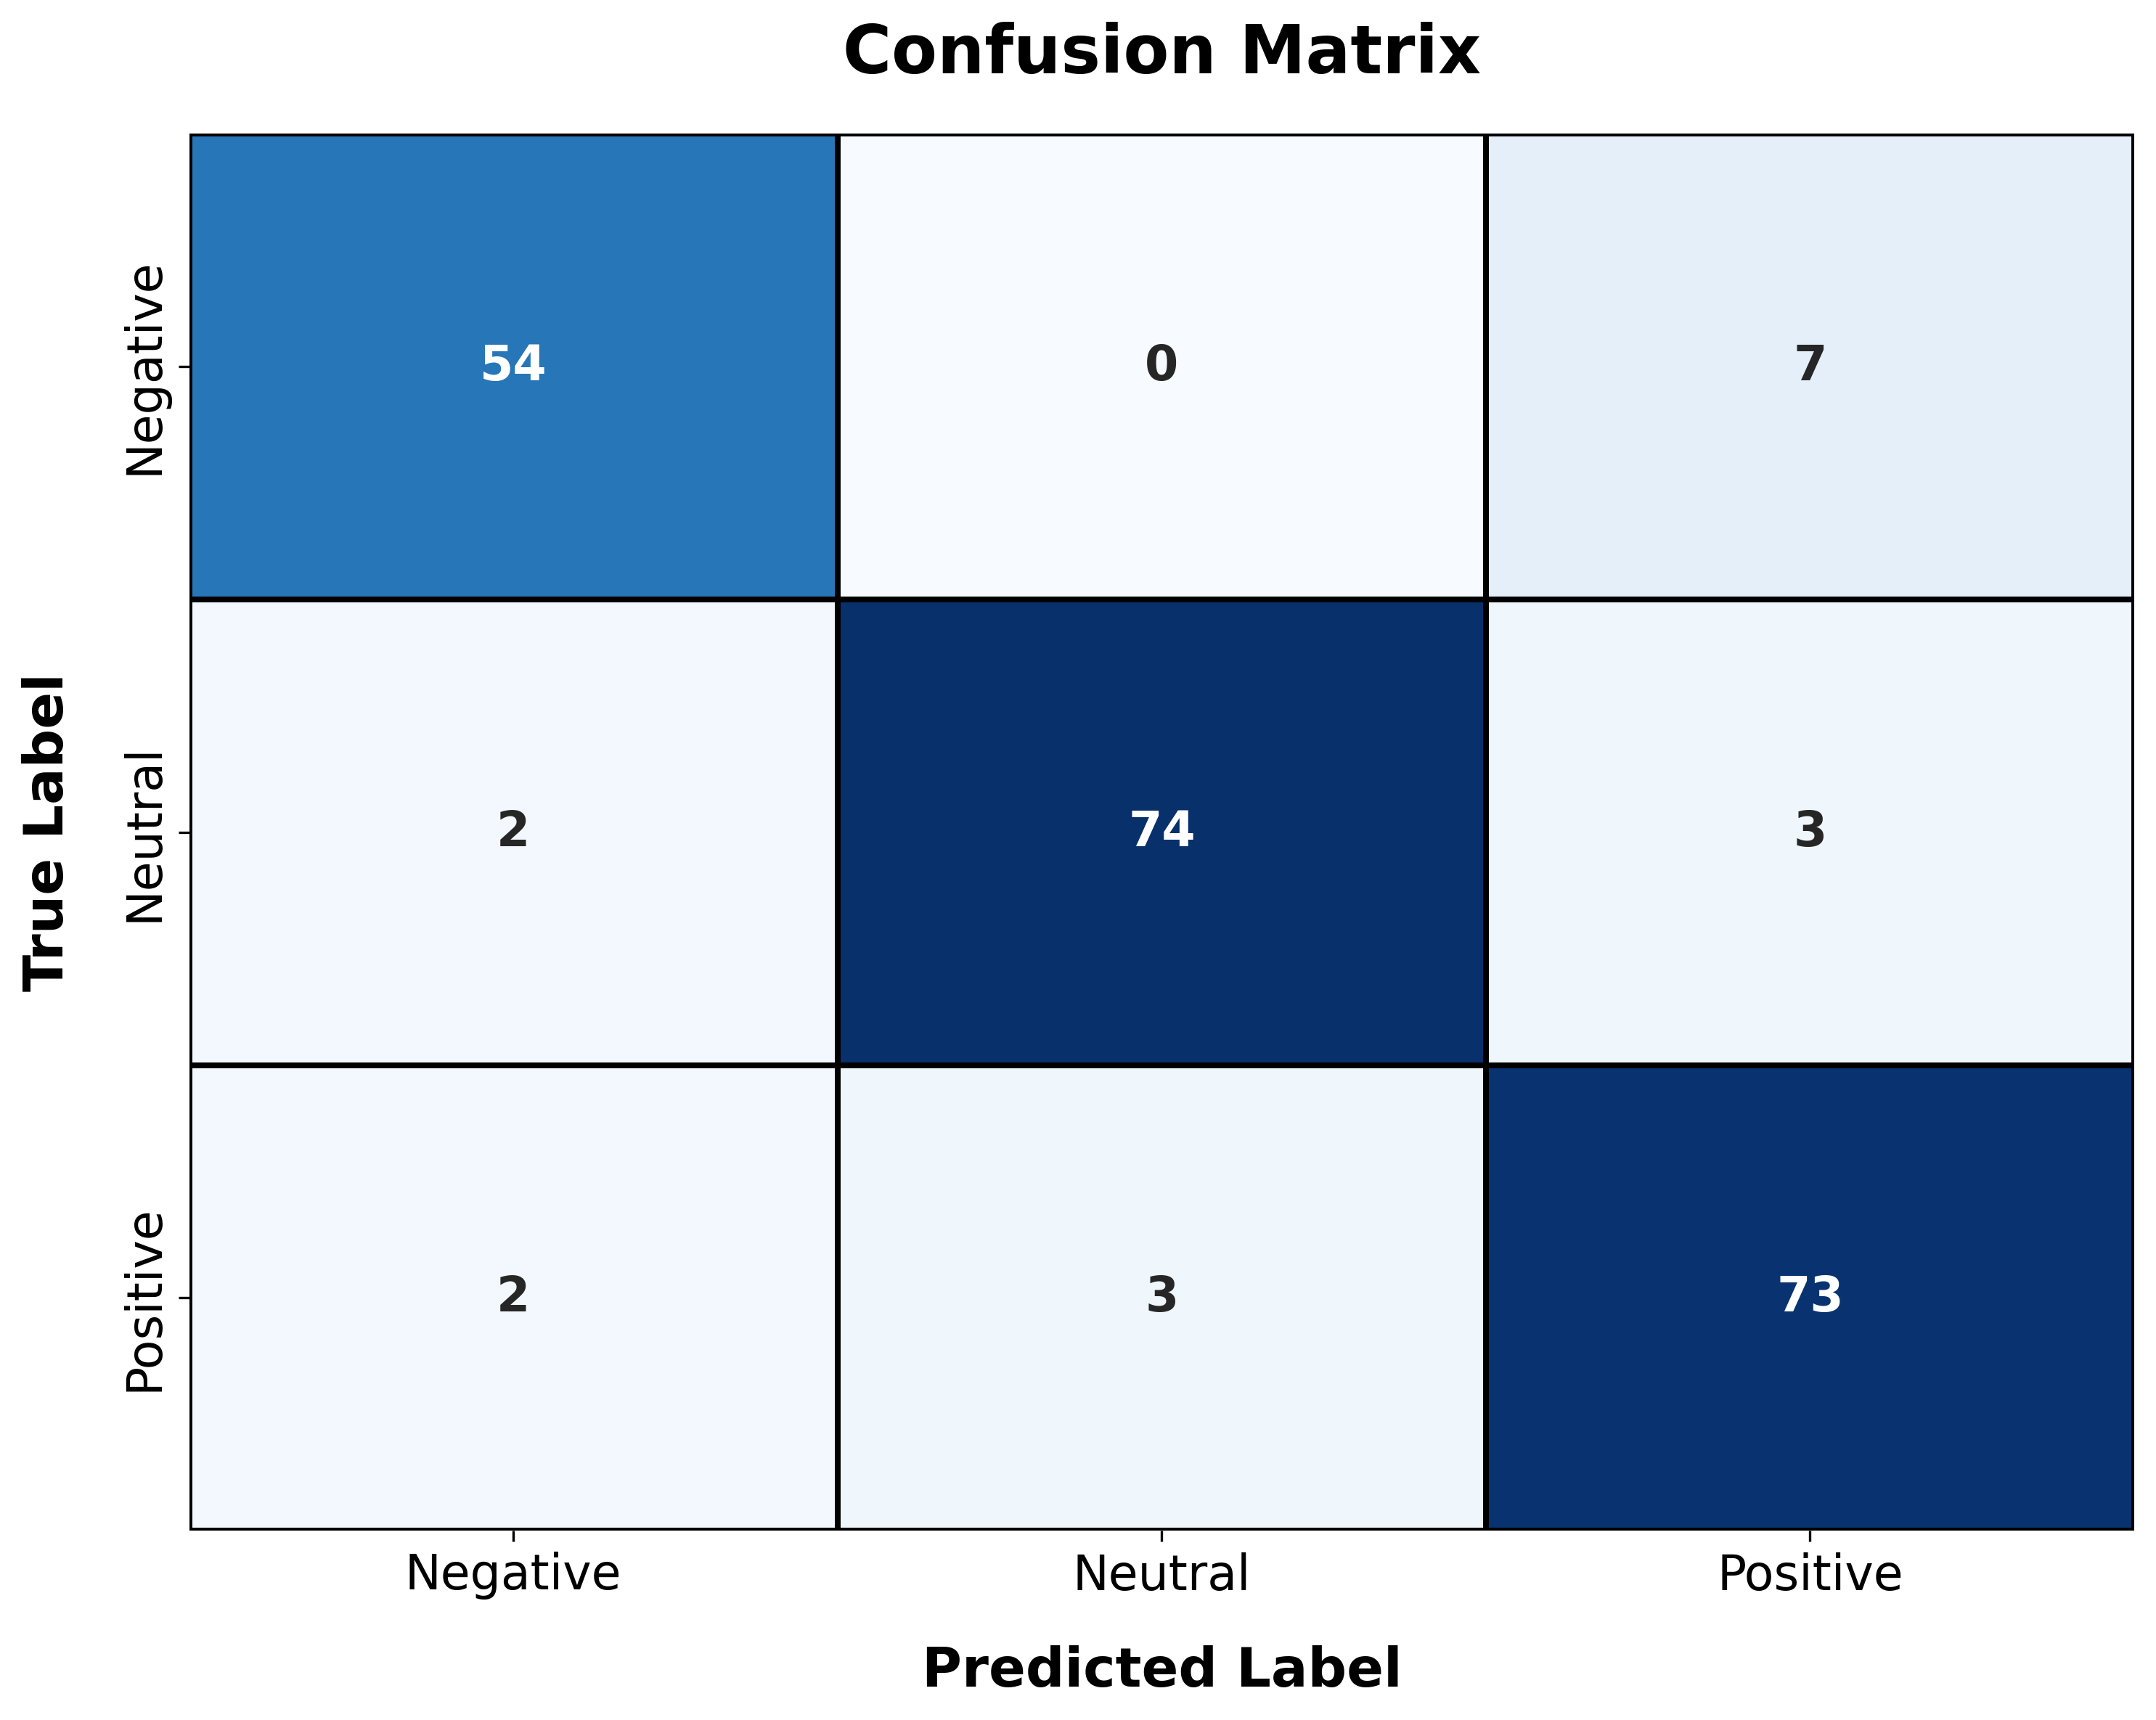

In [19]:
# import sns
import seaborn as sns

# calculate and plot the confusion matrix 
cm = confusion_matrix(y_true, y_pred)

# Create figure with higher resolution for academic publishing
plt.figure(figsize=(10, 8), dpi=300)

# Create a heatmap with improved styling for academic papers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'],
            annot_kws={"size": 16, "weight": "bold"},  # Bold numbers inside cells
            linewidths=1.5, linecolor='black')  # Thicker cell borders

# Set title and labels with academic styling
plt.title('Confusion Matrix', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=18, fontweight='bold', labelpad=15)
plt.ylabel('True Label', fontsize=18, fontweight='bold', labelpad=15)

# Increase tick label size for better readability in papers
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()



